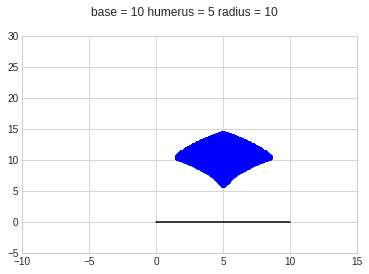

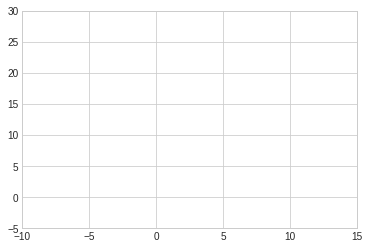

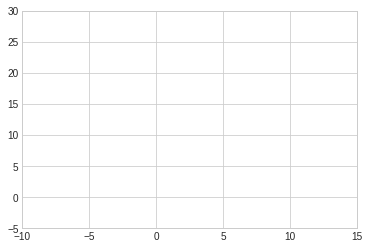

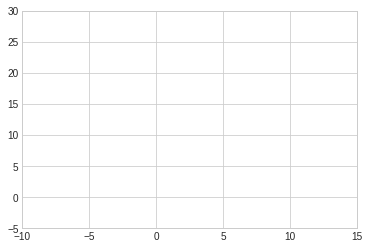

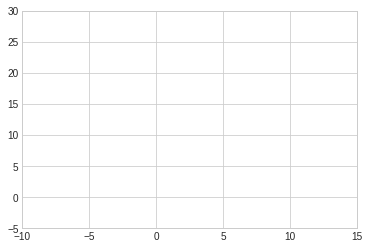

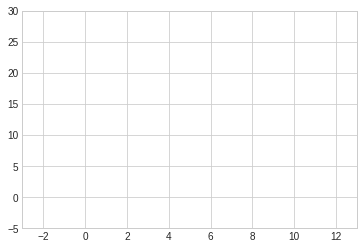

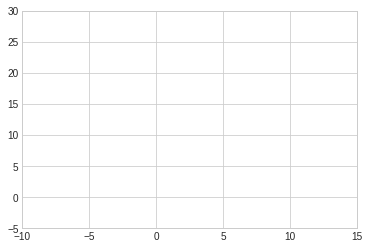

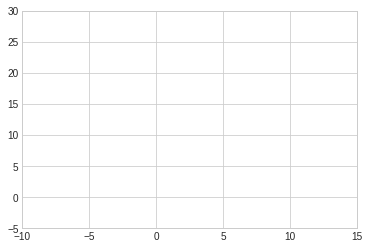

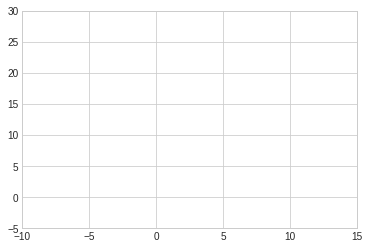

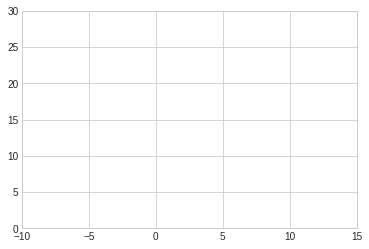

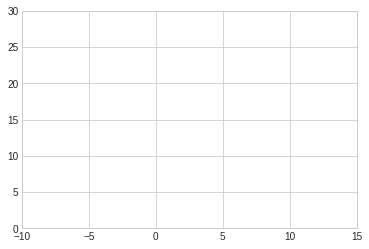

In [4]:
# 5-Bar Linkage : Forward Kinematics
#
# from Study and Development of Parallel Robots Based On 5-Bar Linkage
# Manh Tuong Hoang, Trung Tin Vuong, Cong Bang Pham 2015
# https://www.researchgate.net/publication/283356024_Study_and_Development_of_Parallel_Robots_Based_On_5-Bar_Linkage

import math
import numpy as np
import mpmath
from mpmath import mp, mpf, fp
import matplotlib.pyplot as plt

minAngle = 30
maxAngle = 120

mpmath.mp.dps = 100 # decimal places
mpmath.mp.prec = 100 # precision

nPoints = 50
 
def forward(base, humerus, radius, angleL, angleR):
    E = 2.0*radius*(base+humerus*(mpmath.cos(angleR)-mpmath.cos(angleL)))
    F = 2.0*humerus*radius*(mpmath.sin(angleR)-mpmath.sin(angleL))
    G = base*base+2.0*humerus*humerus+2.0*base*humerus*mpmath.cos(angleR)-2.0*humerus*humerus*mpmath.cos(angleR-angleL)

    if G-E != 0 and E*E+F*F-G*G > 0: # avoid div by zero, sqrt of negative
        lumpXminus = (-F-mpmath.sqrt(E*E+F*F-G*G)) / (G-E)
        lumpYminus = (-F-mpmath.sqrt(E*E+F*F-G*G)) / (G-E)
        xMinus = base+humerus*mpmath.cos(angleR)+radius*mpmath.cos(2.0*mpmath.atan(lumpXminus))
        yMinus = humerus*mpmath.sin(angleR)+radius*mpmath.sin(2.0*mpmath.atan(lumpYminus))

        return [xMinus, yMinus]
#        if xMinus > 5:
#            ax.plot(xMinus, yMinus, 'o', color='blue')



def plotArea(ax, fig, base, humerus, radius):
    angleMin = mpf(minAngle * mpmath.pi/180)
    angleMax = mpf(maxAngle * mpmath.pi/180)

    anglesL = mpmath.linspace(angleMin, angleMax, nPoints)
    anglesR = mpmath.linspace(angleMin, angleMax, nPoints)
    
    title = 'base = '+str(base)+' humerus = '+str(humerus)+' radius = '+str(radius)
    fig.suptitle(title)
    plt.grid(True)

    for angleL in anglesL:
        for angleR in anglesR:
            if forward(base, humerus, radius, angleL, angleR):
                [x, y] = forward(base, humerus, radius, angleL, angleR)
                if x >= base/2:
                    ax.plot(x, y, 'o', color='blue')
                    ax.plot(base-x, y, 'o', color='blue')

baselineX = mpmath.linspace(0, 10, 100)
baselineY = mpmath.zeros(100, 1)

xMin = -10
xMax = 15
yMin = -5
yMax = 30

plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots()
    
plotArea(ax, fig, 10, 5, 10)
ax.plot(baselineX, baselineY, color='black')
plt.xlim([xMin, xMax])
plt.ylim([yMin, yMax])
plt.show()

plotArea(ax, fig, 10, 10, 5)
ax.plot(baselineX, baselineY, color='black')
plt.xlim([xMin, xMax])
plt.ylim([yMin, yMax])
plt.show()

plotArea(ax, fig, 2.5, 7.5, 7.5)
ax.plot(baselineX, baselineY, color='black')
plt.xlim([xMin, xMax])
plt.ylim([yMin, yMax])
plt.show()

plotArea(ax, fig, 5, 7.5, 7.5)
ax.plot(baselineX, baselineY, color='black')
plt.xlim([xMin, xMax])
plt.ylim([yMin, yMax])
plt.show()

plotArea(ax, fig, 7.5, 7.5, 7.5)
ax.plot(baselineX, baselineY, color='black')
plt.xlim([xMin, xMax])
plt.ylim([yMin, yMax])
plt.show()

plotArea(ax, fig, 10, 7.5, 7.5)
ax.plot(baselineX, baselineY, color='black')
plt.xlim([-3, 13])
plt.ylim([yMin, yMax])
plt.show()

plotArea(ax, fig, 10, 10, 10)
ax.plot(baselineX, baselineY, color='black')
plt.xlim([xMin, xMax])
plt.ylim([yMin, yMax])
plt.show()

plotArea(ax, fig, 10, 5, 10)
ax.plot(baselineX, baselineY, color='black')
plt.xlim([xMin, xMax])
plt.ylim([yMin, yMax])
plt.show()

plotArea(ax, fig, 20, 10, 10)
ax.plot(baselineX, baselineY, color='black')
plt.xlim([xMin, xMax])
plt.ylim([yMin, yMax])
plt.show()

plotArea(ax, fig, 20, 15, 15)
ax.plot(baselineX, baselineY, color='black')
plt.xlim([xMin, xMax])
plt.ylim([0, 30])
plt.show()

plotArea(ax, fig, 20, 10, 20)
ax.plot(baselineX, baselineY, color='black')
plt.xlim([xMin, xMax])
plt.ylim([0, 30])
plt.show()